In [1]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Paths

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# Set the number of classes

 This Depends on the number of dynamic gestures in the system.

In [3]:
NUM_CLASSES = 6

In [4]:
TIME_STEPS = 16
DIMENSION = 2

# Dataset Readings

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.8, random_state=RANDOM_SEED)

# Model Architecture

In [8]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

Metal device set to: Apple M1 Pro


In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 24)                792       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                250       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
Total params: 1,108
Trainable params: 1,108
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model Training

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=256,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/200


2023-05-06 22:09:05.897258: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


16/16 [==============================] - ETA: 0s - loss: 1.7640 - accuracy: 0.3161
Epoch 1: saving model to model/point_history_classifier/point_history_classifier.hdf5
16/16 [==============================] - 1s 26ms/step - loss: 1.7640 - accuracy: 0.3161 - val_loss: 1.7415 - val_accuracy: 0.4156
Epoch 2/200
13/16 [=======================>......] - ETA: 0s - loss: 1.7178 - accuracy: 0.3582
Epoch 2: saving model to model/point_history_classifier/point_history_classifier.hdf5
16/16 [==============================] - 0s 13ms/step - loss: 1.7156 - accuracy: 0.3594 - val_loss: 1.6867 - val_accuracy: 0.4894
Epoch 3/200
14/16 [=========================>....] - ETA: 0s - loss: 1.6682 - accuracy: 0.3923
Epoch 3: saving model to model/point_history_classifier/point_history_classifier.hdf5
16/16 [==============================] - 0s 12ms/step - loss: 1.6653 - accuracy: 0.3920 - val_loss: 1.6258 - val_accuracy: 0.5046
Epoch 4/200
14/16 [=========================>....] - ETA: 0s - loss: 1.6077 - a

15/16 [===========================>..] - ETA: 0s - loss: 0.7215 - accuracy: 0.8107
Epoch 53: saving model to model/point_history_classifier/point_history_classifier.hdf5
16/16 [==============================] - 0s 11ms/step - loss: 0.7206 - accuracy: 0.8103 - val_loss: 0.4984 - val_accuracy: 0.8908
Epoch 54/200
15/16 [===========================>..] - ETA: 0s - loss: 0.7166 - accuracy: 0.8161
Epoch 54: saving model to model/point_history_classifier/point_history_classifier.hdf5
16/16 [==============================] - 0s 12ms/step - loss: 0.7187 - accuracy: 0.8141 - val_loss: 0.4960 - val_accuracy: 0.8888
Epoch 55/200
15/16 [===========================>..] - ETA: 0s - loss: 0.6863 - accuracy: 0.8185
Epoch 55: saving model to model/point_history_classifier/point_history_classifier.hdf5
16/16 [==============================] - 0s 11ms/step - loss: 0.6913 - accuracy: 0.8194 - val_loss: 0.4952 - val_accuracy: 0.8898
Epoch 56/200
16/16 [==============================] - ETA: 0s - loss: 0.69

16/16 [==============================] - ETA: 0s - loss: 0.6084 - accuracy: 0.8359
Epoch 105: saving model to model/point_history_classifier/point_history_classifier.hdf5
16/16 [==============================] - 0s 11ms/step - loss: 0.6084 - accuracy: 0.8359 - val_loss: 0.4015 - val_accuracy: 0.8888
Epoch 106/200
16/16 [==============================] - ETA: 0s - loss: 0.5939 - accuracy: 0.8392
Epoch 106: saving model to model/point_history_classifier/point_history_classifier.hdf5
16/16 [==============================] - 0s 11ms/step - loss: 0.5939 - accuracy: 0.8392 - val_loss: 0.3999 - val_accuracy: 0.8898
Epoch 107/200
15/16 [===========================>..] - ETA: 0s - loss: 0.6037 - accuracy: 0.8331
Epoch 107: saving model to model/point_history_classifier/point_history_classifier.hdf5
16/16 [==============================] - 0s 11ms/step - loss: 0.6039 - accuracy: 0.8323 - val_loss: 0.3987 - val_accuracy: 0.8898
Epoch 108/200
15/16 [===========================>..] - ETA: 0s - loss

15/16 [===========================>..] - ETA: 0s - loss: 0.5319 - accuracy: 0.8406
Epoch 157: saving model to model/point_history_classifier/point_history_classifier.hdf5
16/16 [==============================] - 0s 11ms/step - loss: 0.5329 - accuracy: 0.8397 - val_loss: 0.3532 - val_accuracy: 0.8979
Epoch 158/200
15/16 [===========================>..] - ETA: 0s - loss: 0.5158 - accuracy: 0.8477
Epoch 158: saving model to model/point_history_classifier/point_history_classifier.hdf5
16/16 [==============================] - 0s 11ms/step - loss: 0.5115 - accuracy: 0.8495 - val_loss: 0.3526 - val_accuracy: 0.8969
Epoch 159/200
15/16 [===========================>..] - ETA: 0s - loss: 0.5311 - accuracy: 0.8380
Epoch 159: saving model to model/point_history_classifier/point_history_classifier.hdf5
16/16 [==============================] - 0s 11ms/step - loss: 0.5288 - accuracy: 0.8379 - val_loss: 0.3511 - val_accuracy: 0.8979
Epoch 160/200
15/16 [===========================>..] - ETA: 0s - loss

In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 56ms/step
[8.9732116e-01 1.2176112e-02 2.7165364e-02 1.4360796e-04 4.5667724e-03
 5.8627091e-02]
0


# Confusion Matrix

31/31 [==============================] - 0s 3ms/step


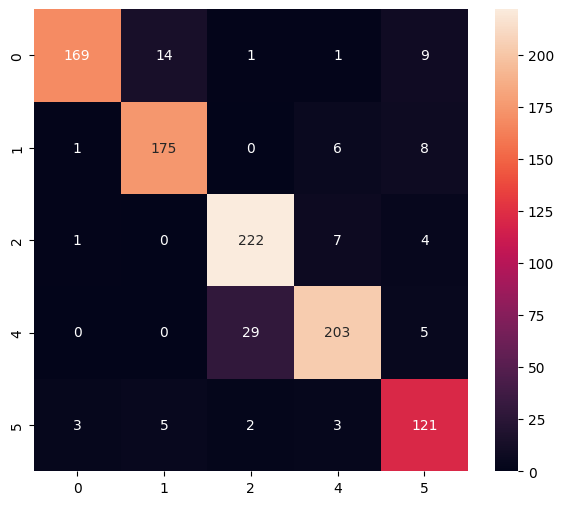

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       194
           1       0.90      0.92      0.91       190
           2       0.87      0.95      0.91       234
           4       0.92      0.86      0.89       237
           5       0.82      0.90      0.86       134

    accuracy                           0.90       989
   macro avg       0.90      0.90      0.90       989
weighted avg       0.90      0.90      0.90       989



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# conversion of the model to Tensorflow Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [17]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [18]:
# Transform model (quantization)
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/5t/ctrl75hx08nbbpg5kvv7k55c0000gn/T/tmp7f_qu18l/assets


2023-05-06 22:09:43.171764: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-05-06 22:09:43.171779: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.


6520

# Inference Test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [20]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([ 1, 32], dtype=int32), 'shape_signature': array([-1, 32], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 164 µs, sys: 96 µs, total: 260 µs
Wall time: 184 µs


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[8.9732111e-01 1.2176107e-02 2.7165361e-02 1.4360799e-04 4.5667719e-03
 5.8627073e-02]
0
